<a href="https://colab.research.google.com/github/Rian021102/Temperature-Prediction/blob/main/Temperature_Prediction_ver02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_dataset.csv')

In [3]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,27.6,23.1,39.548191,95.042191,28.967789,21.177163,5.688959,75.633320,0.160829,0.057036,...,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,4615.589355,31.1
1,27.2,21.6,82.772461,92.669380,23.366994,19.882503,10.517184,55.348512,0.739399,0.811408,...,0.293749,6.382793,1.633845,0.452062,37.4697,126.995,82.2912,2.2579,5697.509766,22.0
2,27.4,21.3,38.357536,91.235947,31.997670,21.208455,5.455236,37.538402,0.060873,0.036346,...,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5517.208008,31.2
3,23.0,20.4,58.720089,96.658218,28.078553,20.119339,4.306388,109.759748,0.350181,0.245563,...,0.000555,0.000000,0.000000,0.000000,37.6181,127.099,53.4712,0.6970,5684.806641,28.1
4,32.2,23.7,53.660091,88.483620,32.368221,24.842951,5.268197,112.164408,0.308527,0.391485,...,0.000206,0.024876,0.000000,0.073391,37.5507,127.135,35.0380,0.5055,5438.163574,32.7


In [4]:
df.shape

(6451, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451 entries, 0 to 6450
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      6451 non-null   float64
 1   Present_Tmin      6451 non-null   float64
 2   LDAPS_RHmin       6451 non-null   float64
 3   LDAPS_RHmax       6451 non-null   float64
 4   LDAPS_Tmax_lapse  6451 non-null   float64
 5   LDAPS_Tmin_lapse  6451 non-null   float64
 6   LDAPS_WS          6451 non-null   float64
 7   LDAPS_LH          6451 non-null   float64
 8   LDAPS_CC1         6451 non-null   float64
 9   LDAPS_CC2         6451 non-null   float64
 10  LDAPS_CC3         6451 non-null   float64
 11  LDAPS_CC4         6451 non-null   float64
 12  LDAPS_PPT1        6451 non-null   float64
 13  LDAPS_PPT2        6451 non-null   float64
 14  LDAPS_PPT3        6451 non-null   float64
 15  LDAPS_PPT4        6451 non-null   float64
 16  lat               6451 non-null   float64


In [6]:
df.describe(include='all')

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,...,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000,6451.000000
mean,29.760595,23.204309,56.752587,88.362980,29.624219,23.521066,7.107025,62.360187,0.367502,0.355211,...,0.575792,0.477942,0.276098,0.262759,37.544612,126.991489,62.321873,1.275162,5342.972699,30.244474
std,2.973131,2.403154,14.662184,7.205800,2.961710,2.349606,2.171595,33.713312,0.262126,0.258584,...,1.882485,1.720664,1.156373,1.182199,0.050665,0.078443,54.625767,1.383362,429.542221,3.116387
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000
25%,27.800000,21.700000,45.885979,84.179070,27.665173,22.090918,5.698929,37.030124,0.145433,0.138914,...,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5005.629395,28.200000
50%,29.900000,23.400000,55.123299,89.802383,29.731790,23.757988,6.555892,56.855880,0.314319,0.311533,...,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5438.163574,30.400000
75%,32.000000,24.800000,67.124153,93.748421,31.723429,25.165640,8.029821,84.167185,0.572873,0.555753,...,0.052421,0.016779,0.007842,0.000039,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.604480,21.857621,213.414006,0.967277,0.968353,...,23.223036,21.276558,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.700000


In [7]:
df.isna().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

<Axes: >

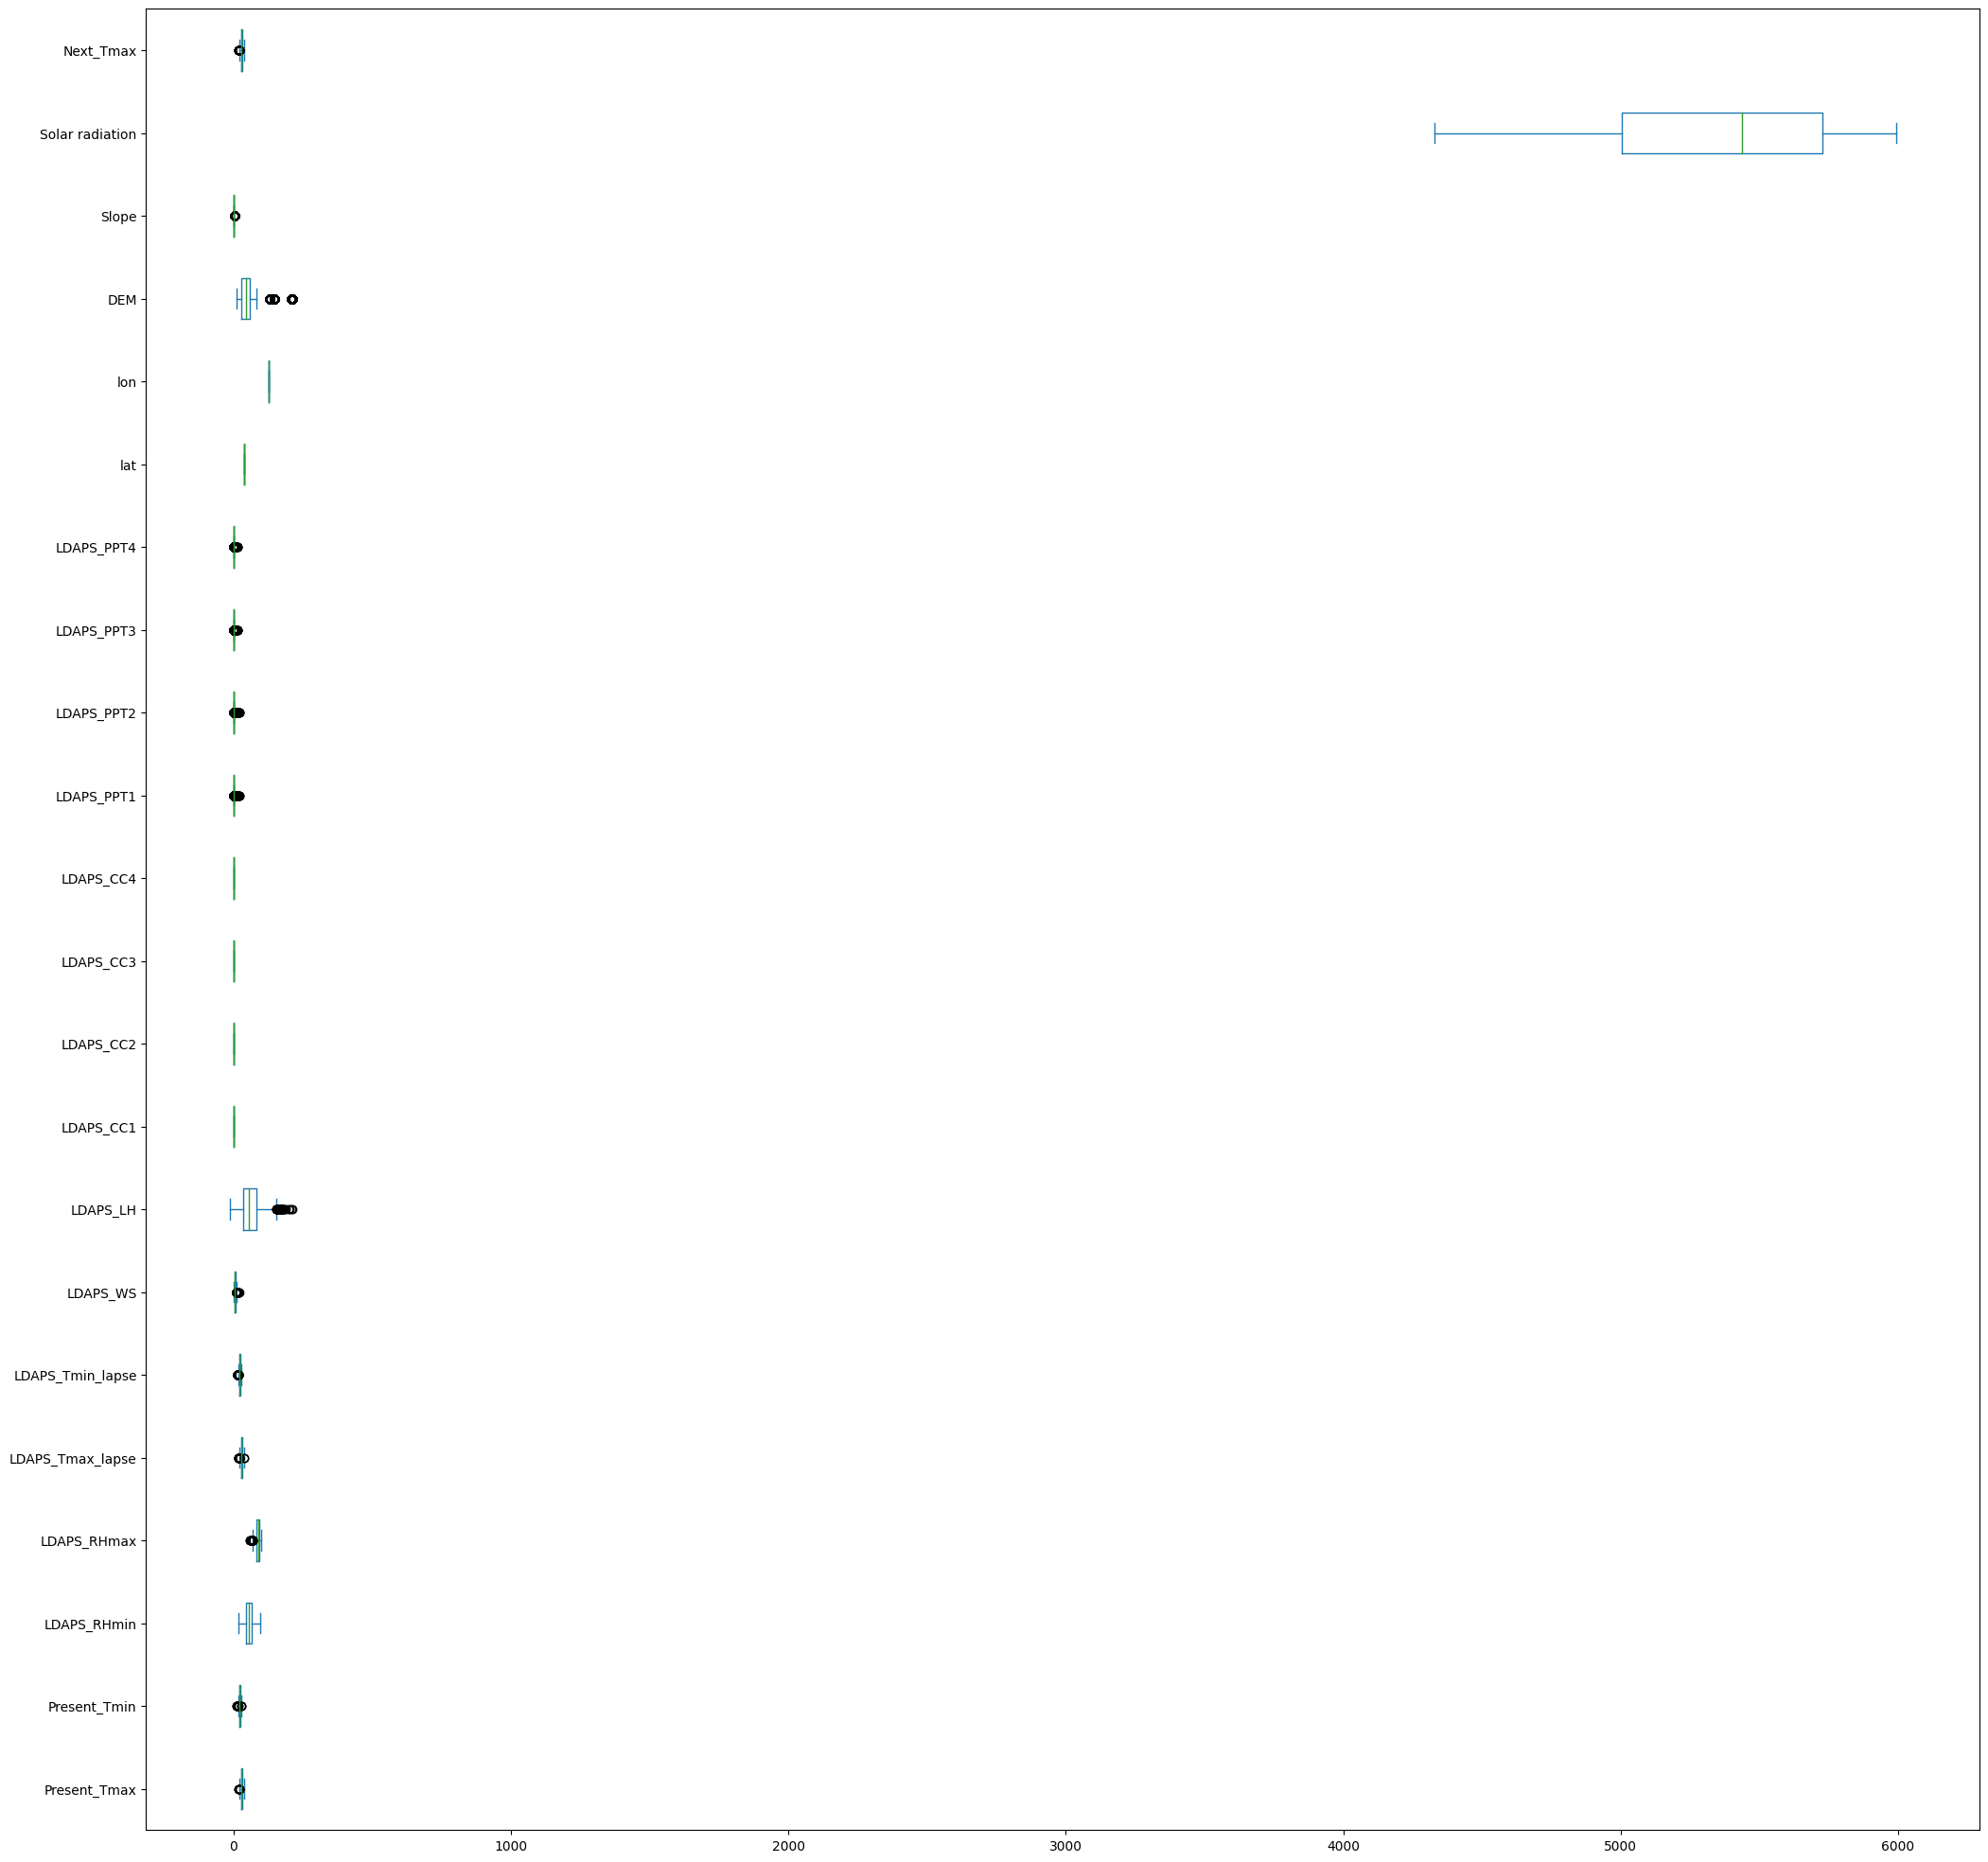

In [8]:
df.plot(kind='box',figsize=(25,25), vert=False)

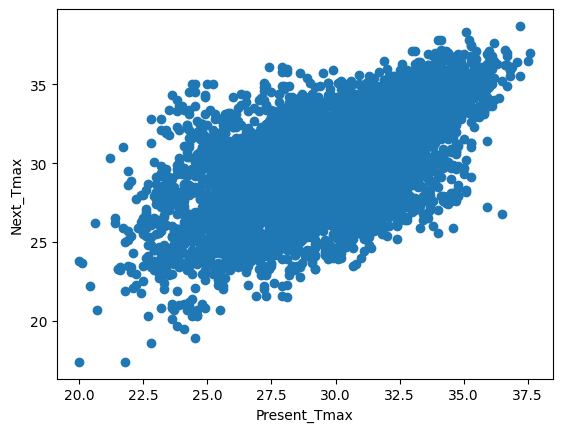

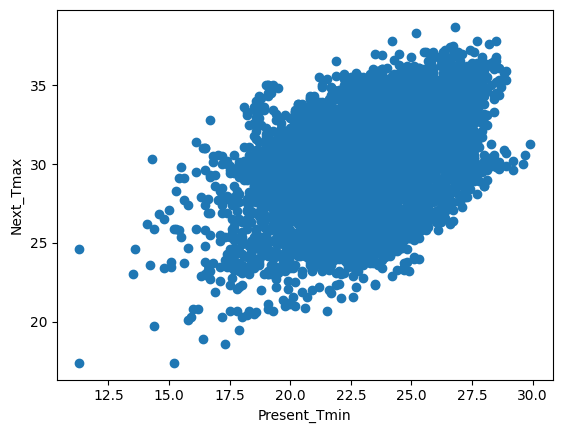

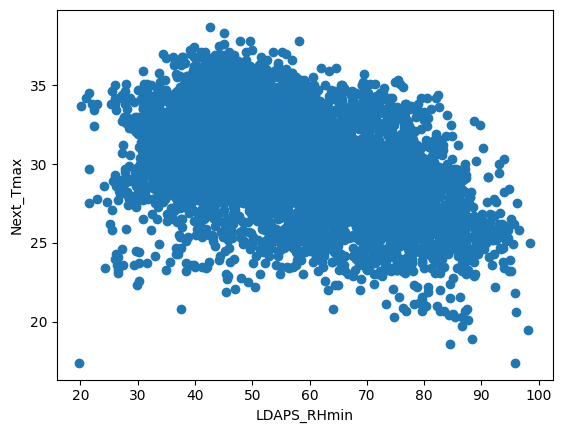

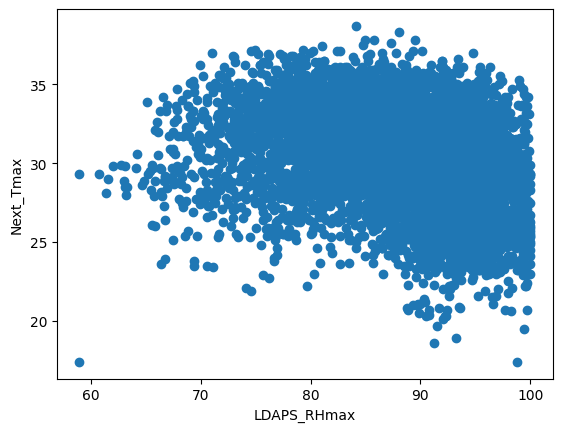

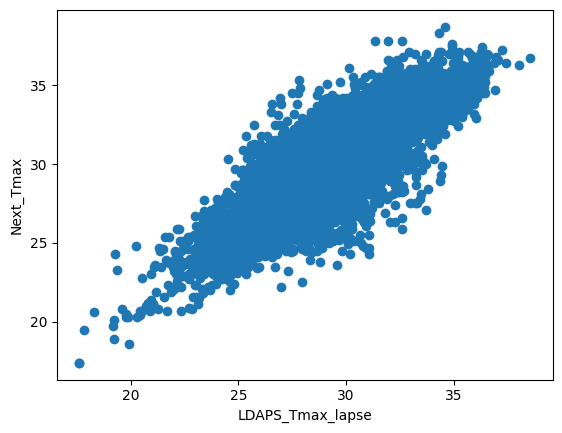

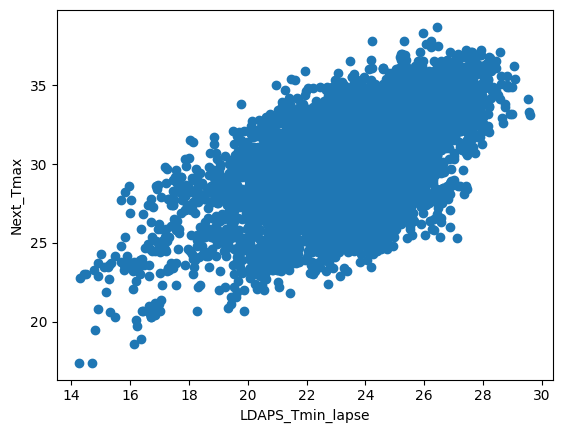

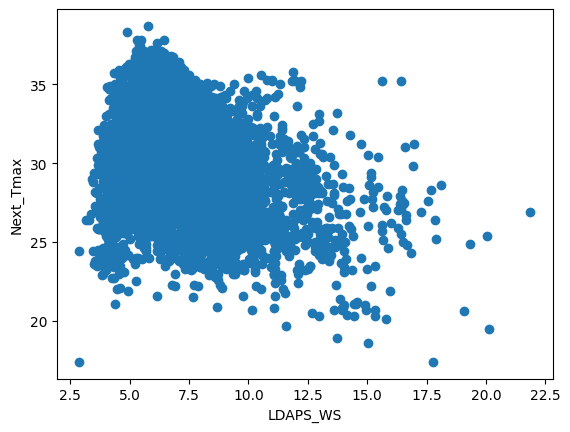

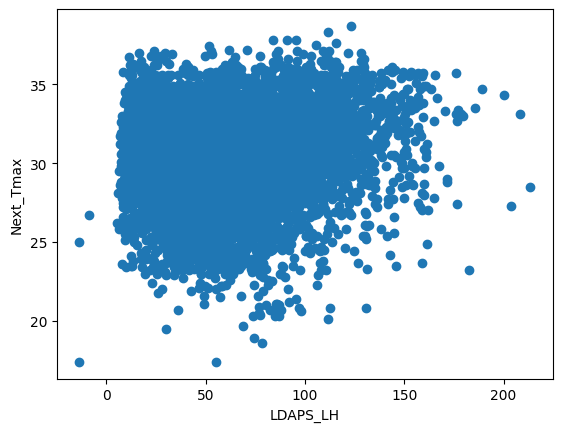

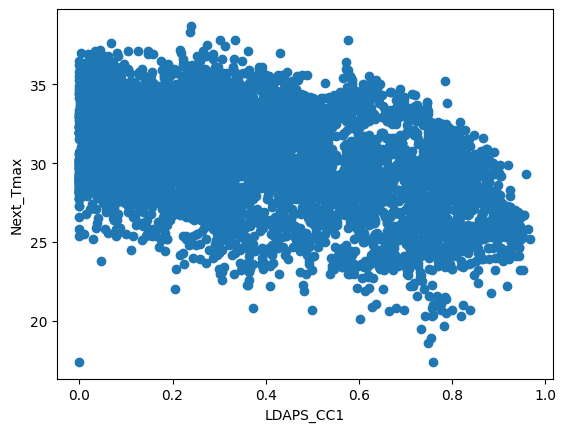

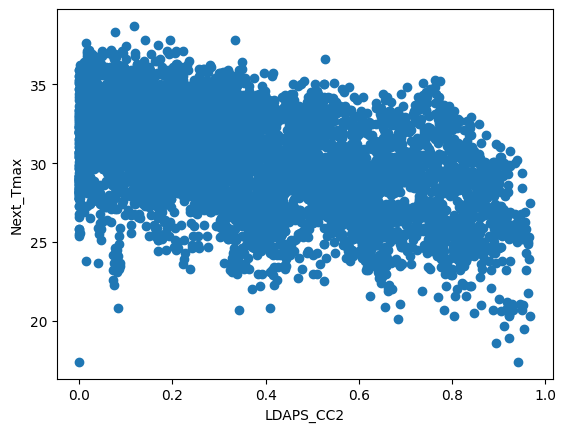

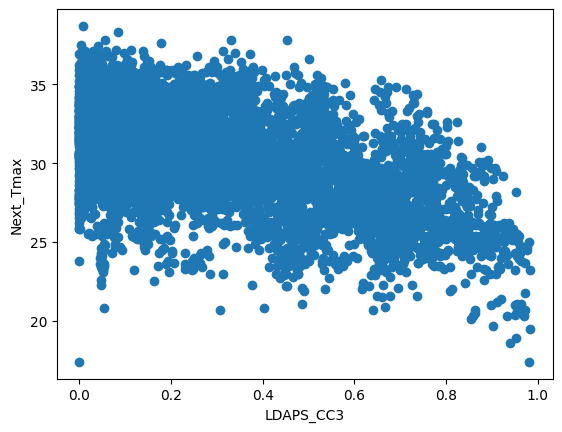

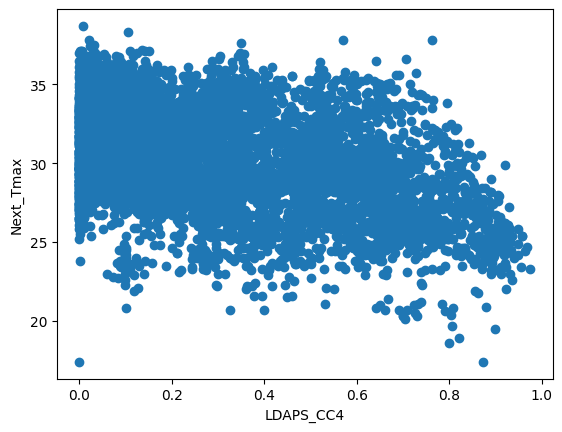

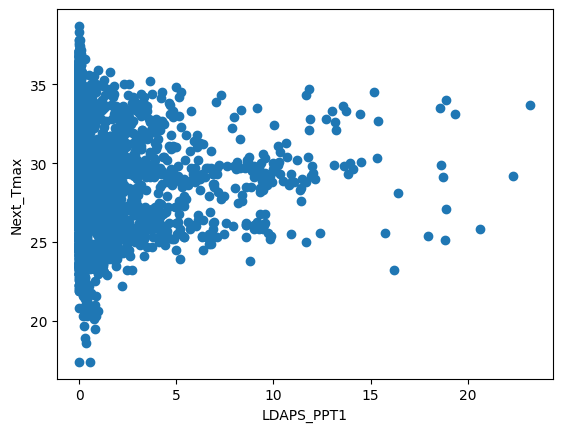

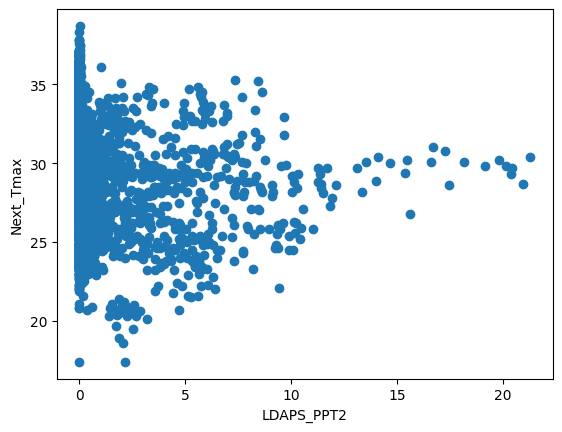

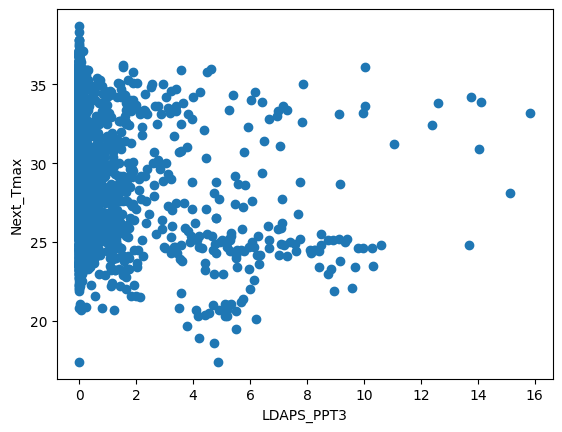

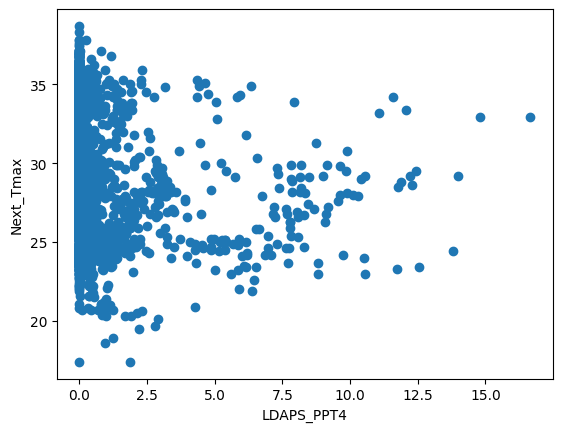

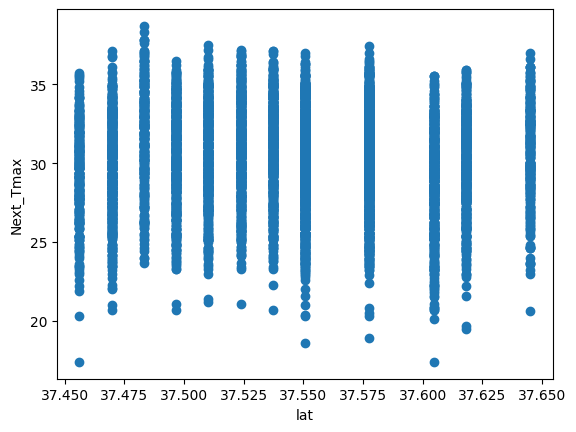

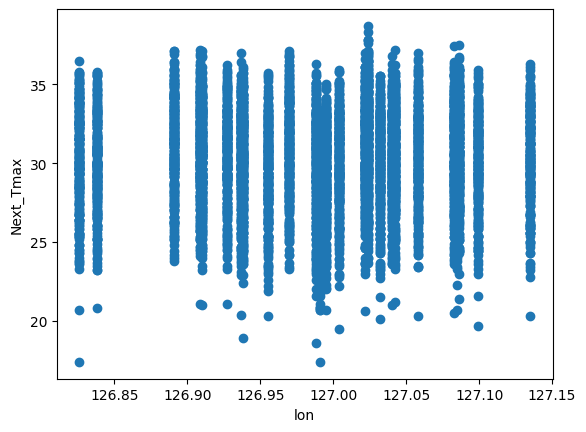

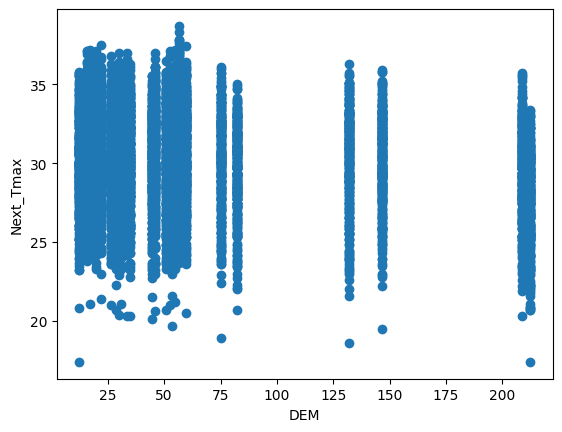

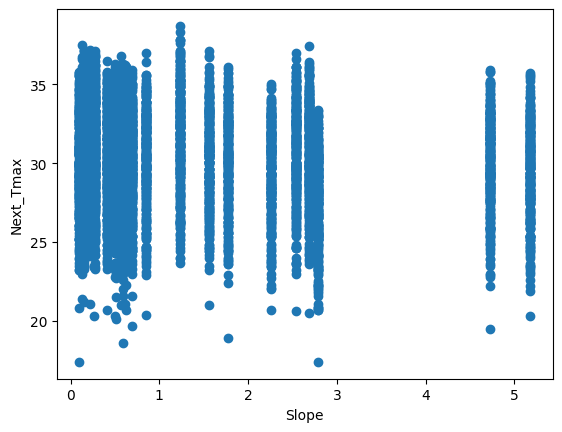

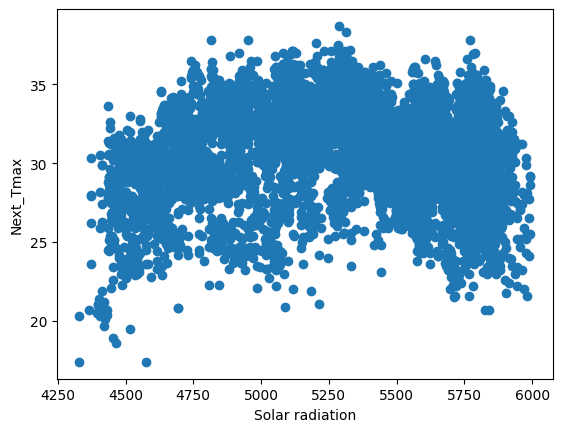

In [9]:
# Define the y-axis column
y_column = "Next_Tmax"

# Iterate over the other columns and plot a scatter plot
for column in df.columns:
    if column != y_column:
        plt.scatter(df[column], df[y_column])
        plt.xlabel(column)
        plt.ylabel(y_column)
        plt.show()

In [10]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Create a folium map centered at the mean latitude and longitude values
mean_lat = df["lat"].mean()
mean_lon = df["lon"].mean()
map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10, tiles="OpenStreetMap")

# Convert the latitude and longitude data into a list of points
heat_data = df[["lat", "lon"]].values.tolist()

# Create a HeatMap layer with the list of points
heat_layer = HeatMap(heat_data, radius=15, blur=10)

# Add the HeatMap layer to the map
heat_layer.add_to(map)

# Display the map
display(map)


array([[<Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>,
        <Axes: title={'center': 'LDAPS_RHmax'}>,
        <Axes: title={'center': 'LDAPS_Tmax_lapse'}>],
       [<Axes: title={'center': 'LDAPS_Tmin_lapse'}>,
        <Axes: title={'center': 'LDAPS_WS'}>,
        <Axes: title={'center': 'LDAPS_LH'}>,
        <Axes: title={'center': 'LDAPS_CC1'}>,
        <Axes: title={'center': 'LDAPS_CC2'}>],
       [<Axes: title={'center': 'LDAPS_CC3'}>,
        <Axes: title={'center': 'LDAPS_CC4'}>,
        <Axes: title={'center': 'LDAPS_PPT1'}>,
        <Axes: title={'center': 'LDAPS_PPT2'}>,
        <Axes: title={'center': 'LDAPS_PPT3'}>],
       [<Axes: title={'center': 'LDAPS_PPT4'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'DEM'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Solar radiation'}>,
       

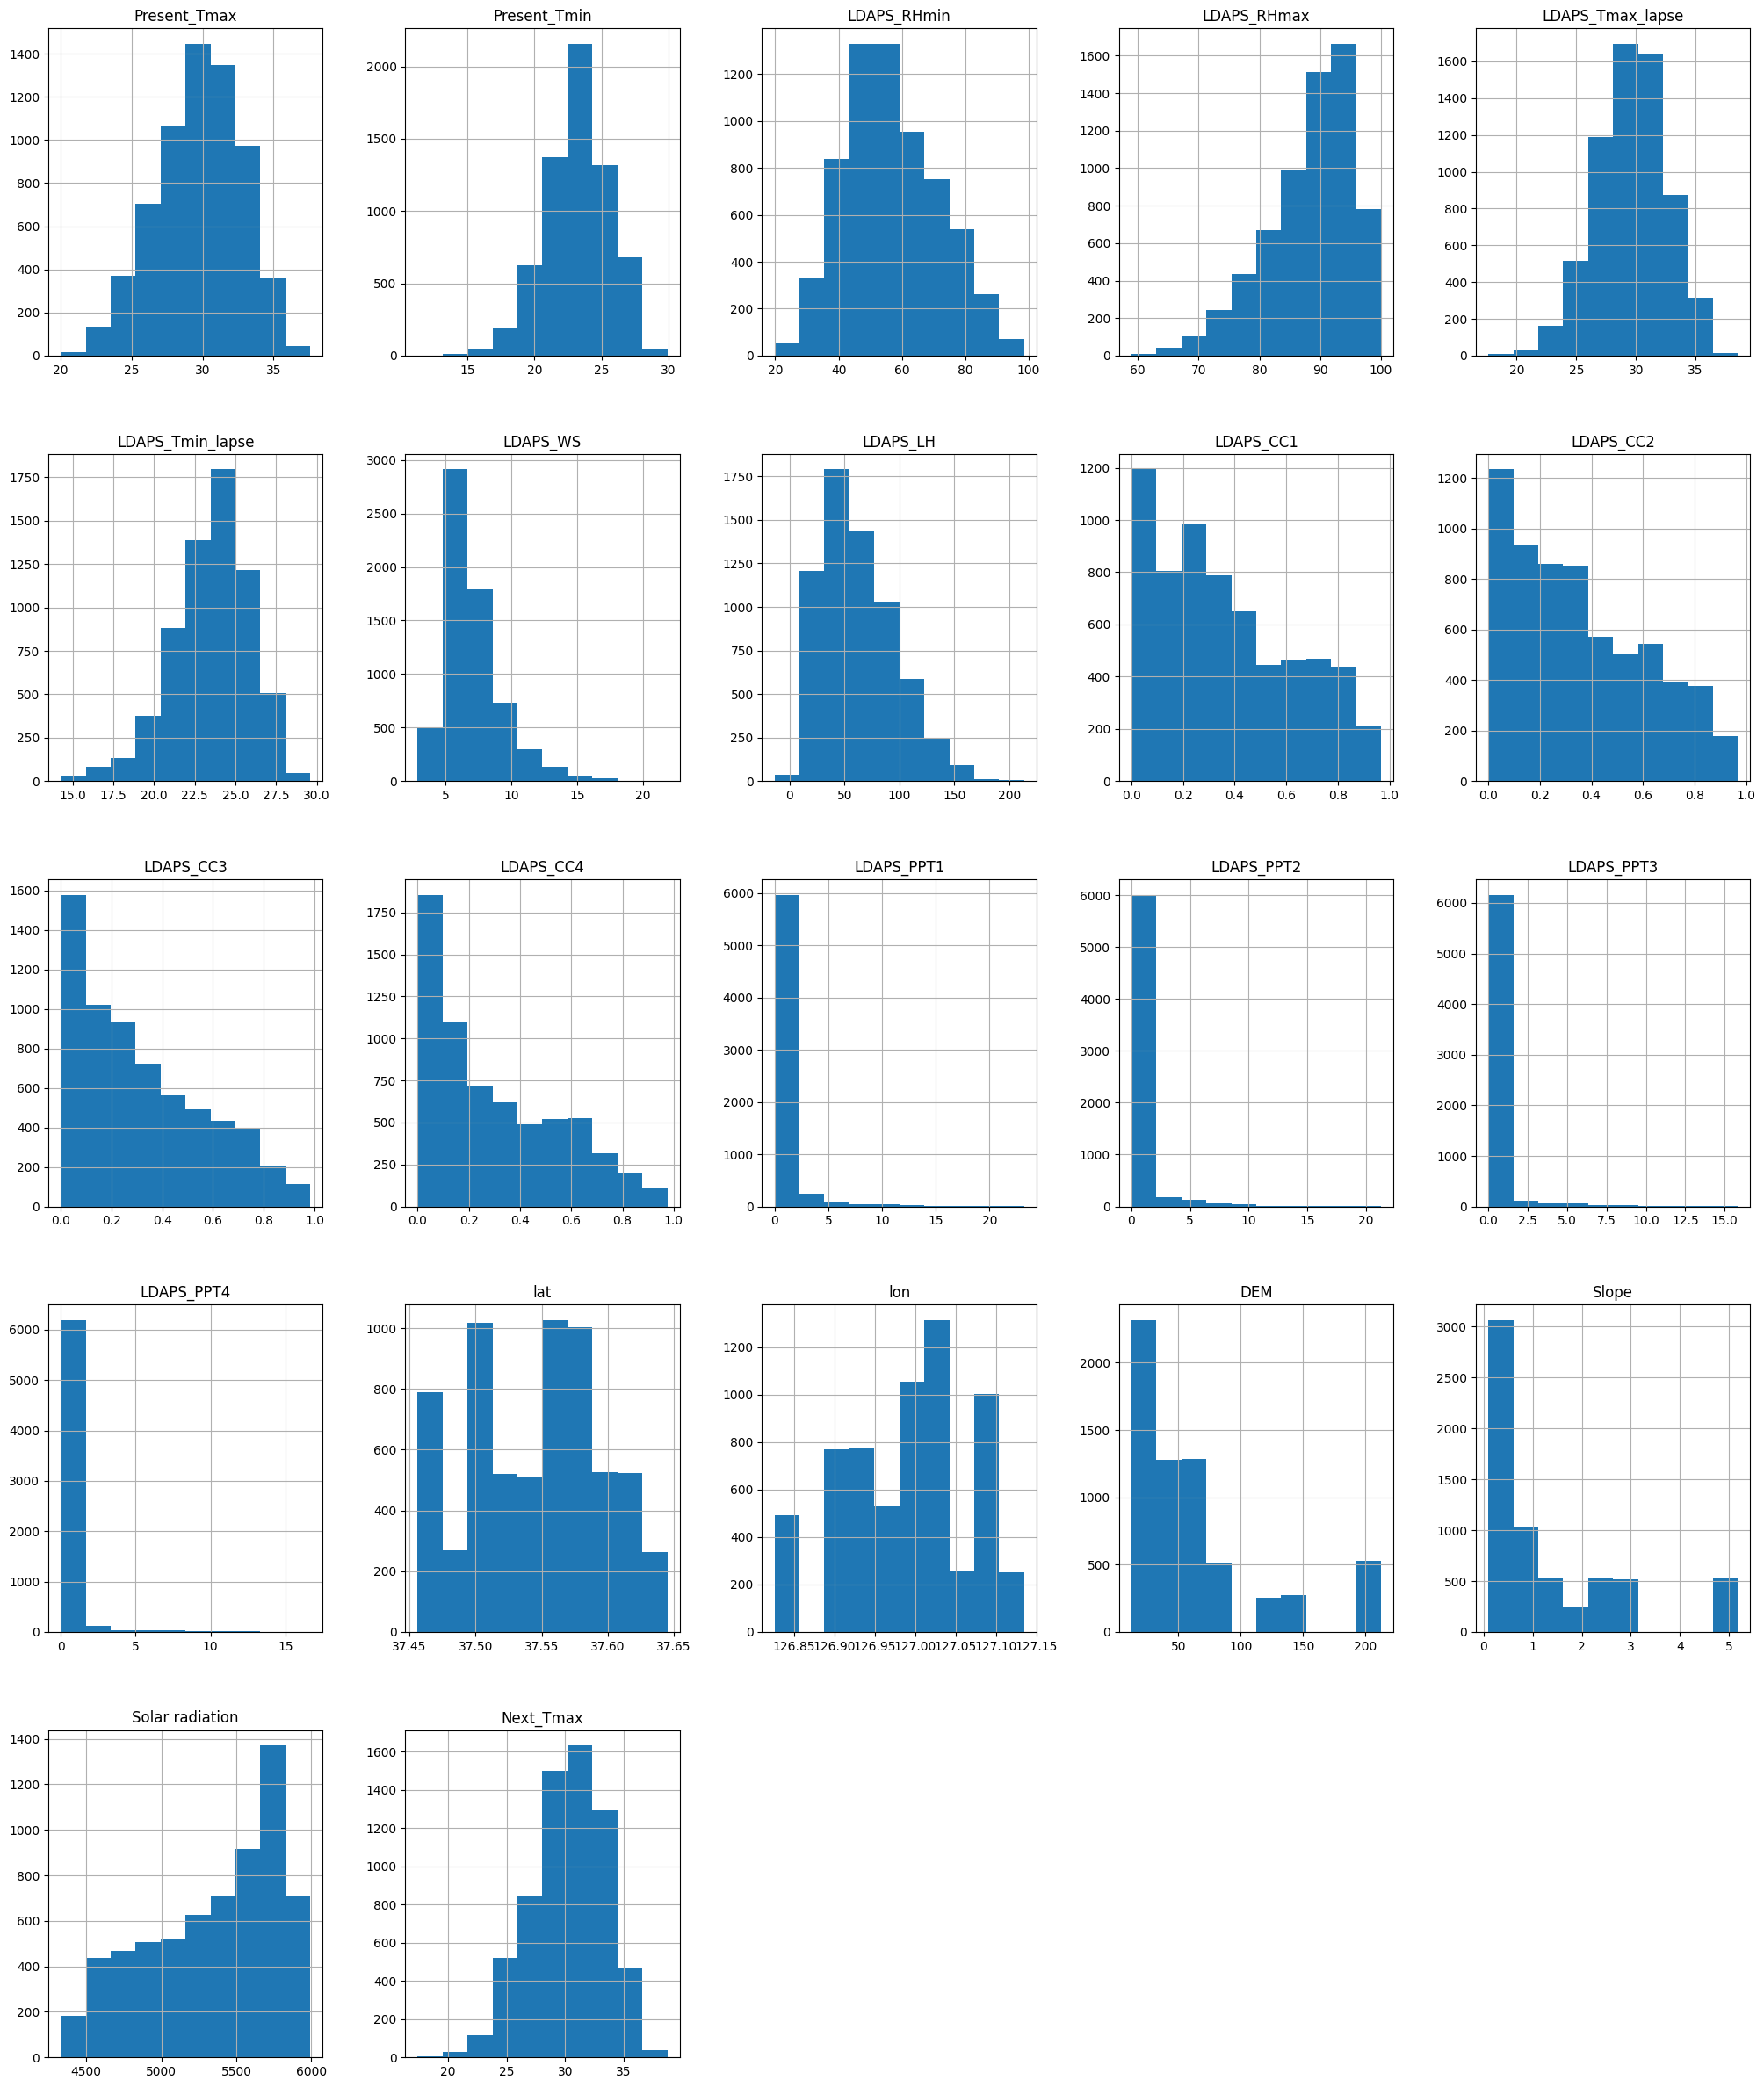

In [11]:
df.hist(figsize=(25,30))

<Axes: >

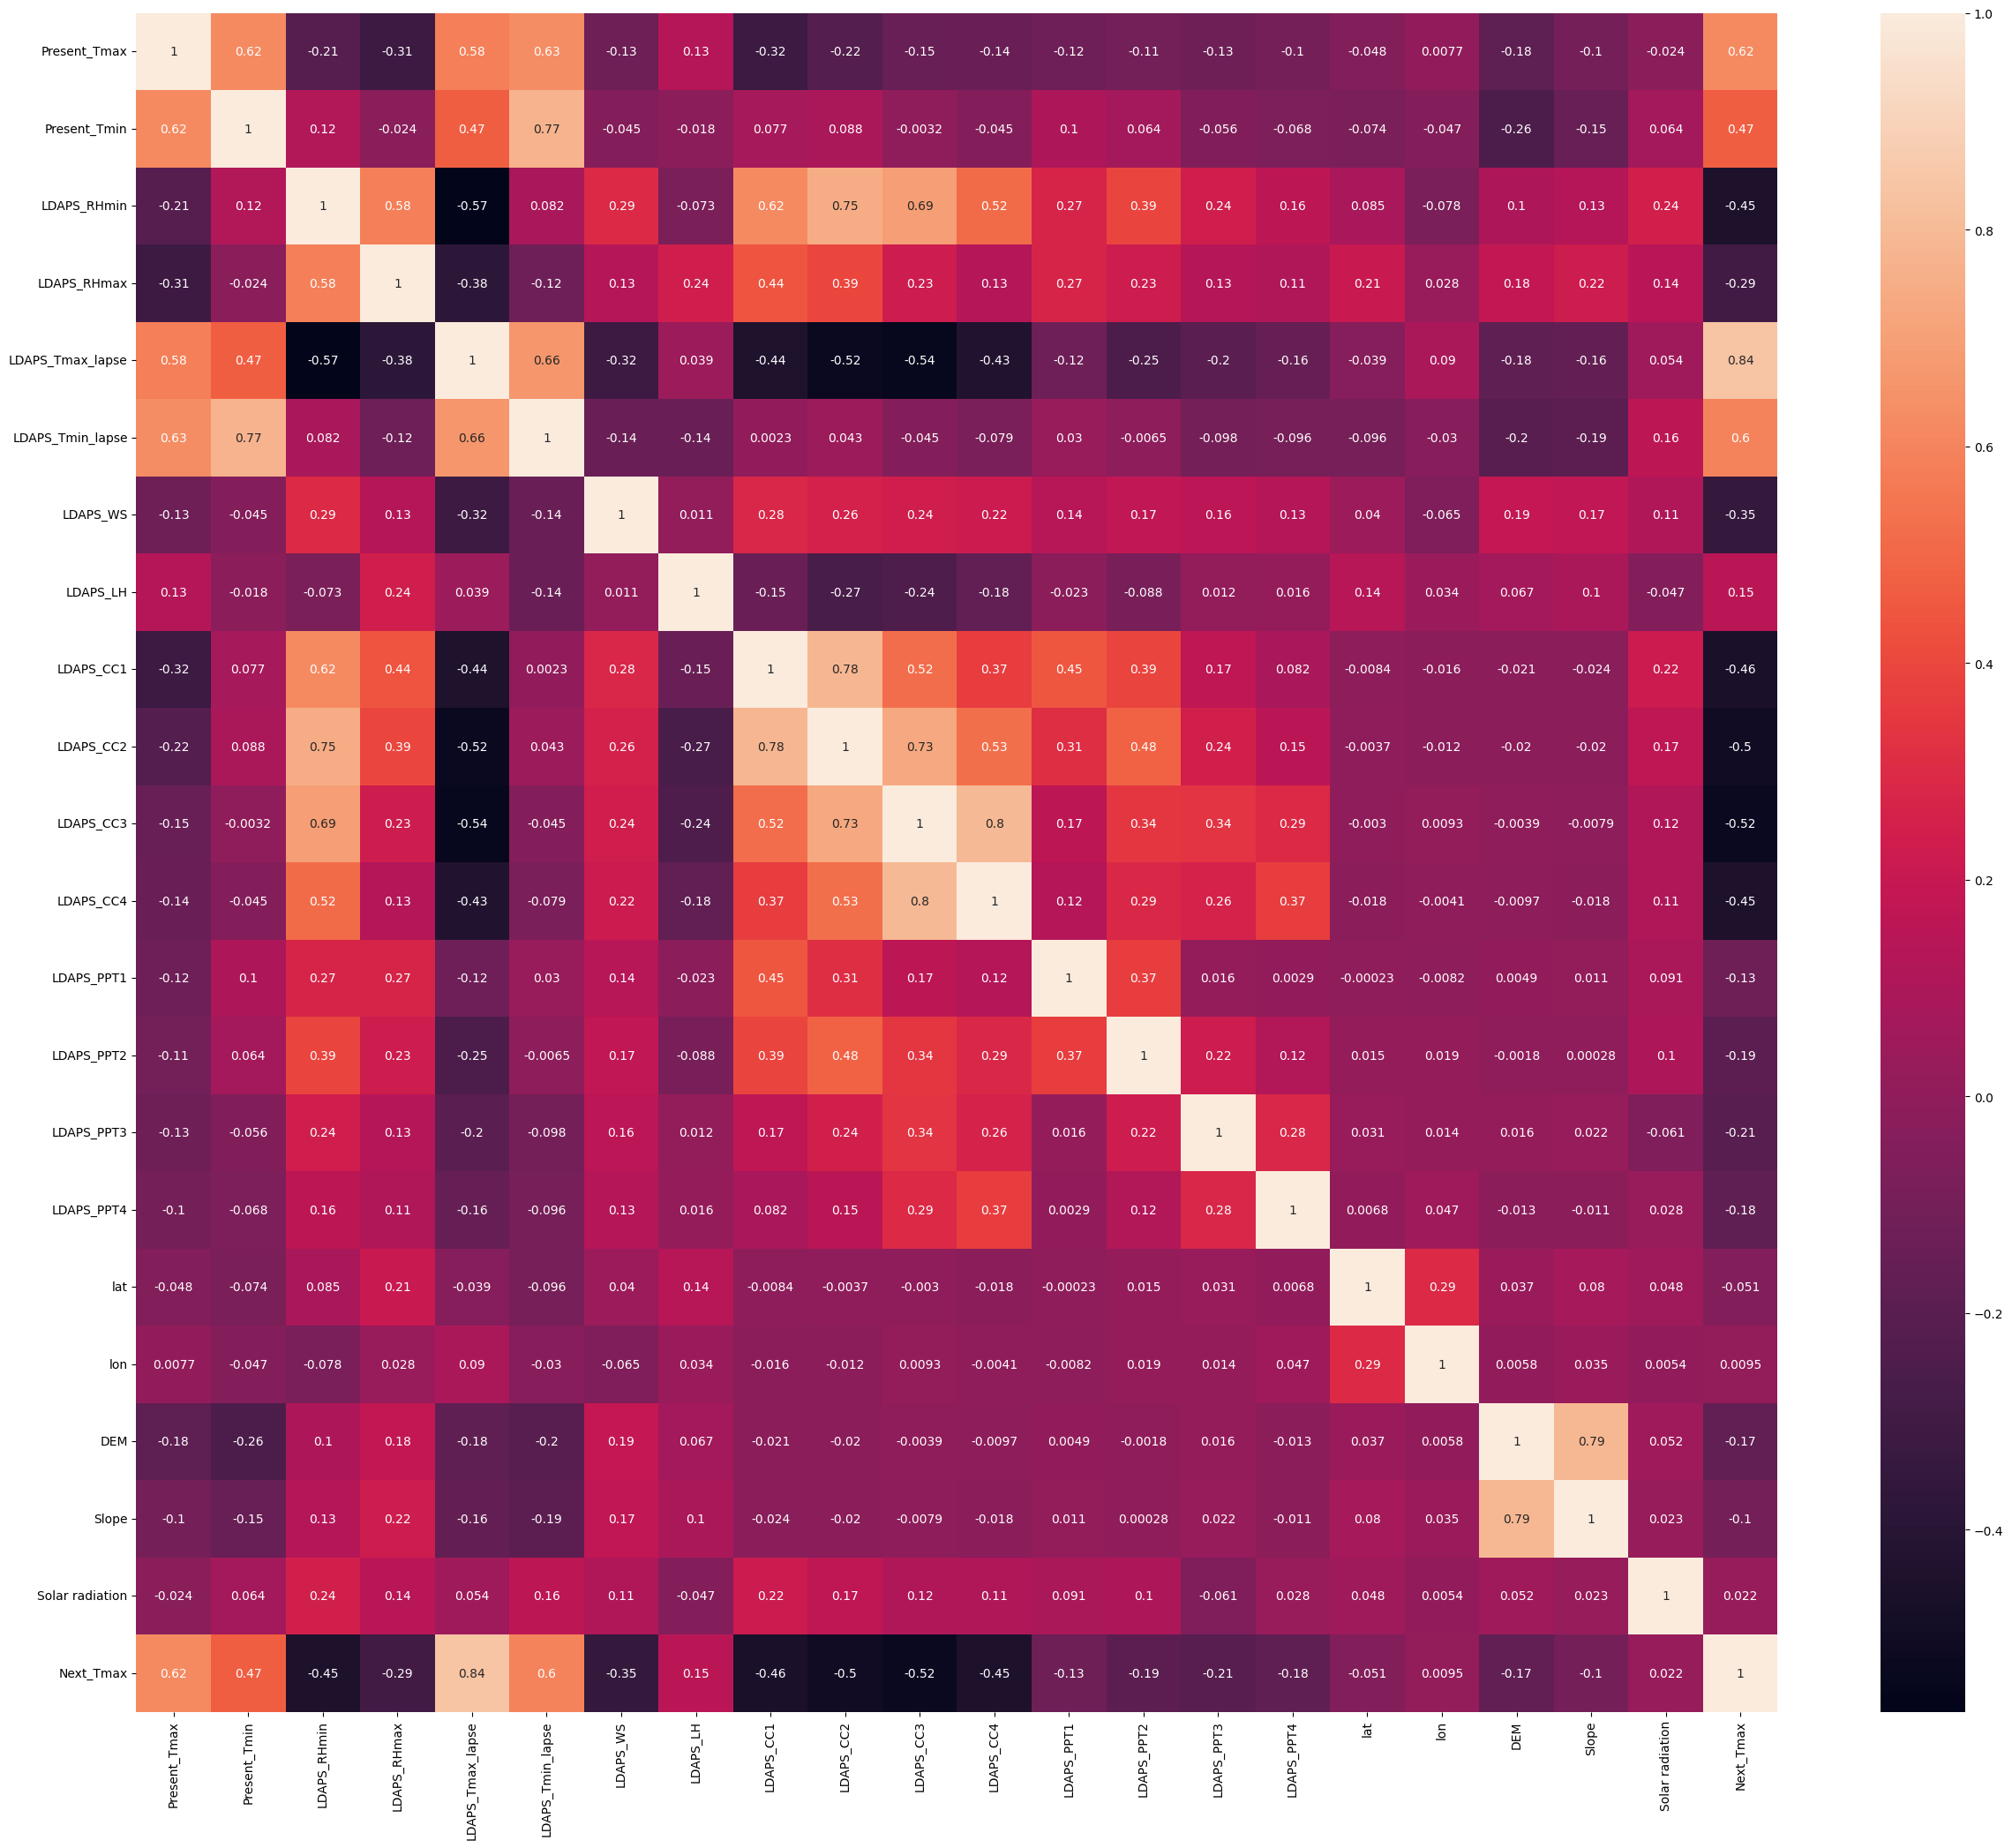

In [12]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True)


In [13]:
X=df.drop(['Next_Tmax'], axis=1)

In [14]:
y=df['Next_Tmax']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4838, 21)
(1613, 21)
(4838,)
(1613,)


In [16]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest

In [17]:
from sklearn.metrics import mean_absolute_error
y_pred=[y_train.mean()]*len(y_train)
print('Mean Absolute Error: ', round(mean_absolute_error(y_train,y_pred),5))

Mean Absolute Error:  2.54021


## Linear Regression

In [18]:
lr=make_pipeline(RobustScaler(),
                 LinearRegression(),
                 )
lr.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

## Random Forest Regression

In [19]:

rfs=make_pipeline(SelectKBest(k='all'),
                  RobustScaler(),
                  RandomForestRegressor(n_estimators=100,
                                        max_depth=50,
                                        random_state=77,
                                        n_jobs=-1)
                  )
rfs.fit(X_train,y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

## Light GBM Regression

In [20]:
lgb=make_pipeline(RobustScaler(),
                  LGBMRegressor(boosting_type='gbdt',
                                num_leaves=31,
                                max_depth=-1,
                                n_estimators=100
                                ))
lgb.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lgbmregressor', LGBMRegressor())])

## Gradient Boosting Regressor

In [21]:
gbr=make_pipeline(RobustScaler(),
                  GradientBoostingRegressor(n_estimators=100,
                                            random_state=42,
                                            max_depth=10
                                            )
                  )
gbr.fit(X_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=10, random_state=42))])

## Mean Absolute Error All Models

In [22]:
print('Linear Regression Train MAE: ', round(mean_absolute_error(y_train,lr.predict(X_train)),5))
print('Linear Regression Test Mae: ', round(mean_absolute_error(y_val,lr.predict(X_val)),5))

Linear Regression Train MAE:  1.10772
Linear Regression Test Mae:  1.1413


In [23]:
print('Random Forest Regressor Train MAE: ', round(mean_absolute_error(y_train, rfs.predict(X_train)),5))
print('Random Forest Regressor Test MAE: ', round(mean_absolute_error(y_val, rfs.predict(X_val)),5))

Random Forest Regressor Train MAE:  0.27865
Random Forest Regressor Test MAE:  0.78734


In [24]:
print('Light GBM Regressor Train MAE:', round(mean_absolute_error(y_train,lgb.predict(X_train)),5))
print('Light GBM Regressor Test MAE:', round(mean_absolute_error(y_val, lgb.predict(X_val)),5))

Light GBM Regressor Train MAE: 0.45312
Light GBM Regressor Test MAE: 0.71579


In [25]:
print('Gradient Boosting Regressor Train MAE:', round(mean_absolute_error(y_train,gbr.predict(X_train)),5))
print('Gradient Boosting Regressor Test MAE:', round(mean_absolute_error(y_val, gbr.predict(X_val)),5))

Gradient Boosting Regressor Train MAE: 0.04779
Gradient Boosting Regressor Test MAE: 0.74743


## Test Train Accuracy for all Models


### Linear Regression


In [26]:
y_pred=lr.predict(X_val)
errors = abs(y_pred - y_val)
# Check for division by zero
mask = y_val != 0
# Calculating MAPE only for non-zero y_val values
mape = 100 * np.mean(errors[mask] / y_val[mask])
# calculating and displaying accuracy
accuracy = 100 - np.mean(mape)
print('Linear Regression Model Prediction Accuracy: ', round(accuracy, 2), '%.')

Linear Regression Model Prediction Accuracy:  96.17 %.


### Random Forest Regressor

In [27]:
y_pred=rfs.predict(X_val)
errors = abs(y_pred - y_val)
# Check for division by zero
mask = y_val != 0
# Calculating MAPE only for non-zero y_val values
mape = 100 * np.mean(errors[mask] / y_val[mask])
# calculating and displaying accuracy
accuracy = 100 - np.mean(mape)
print('Random Forest Regressor Model Prediction Accuracy: ', round(accuracy, 2), '%.')

Random Forest Regressor Model Prediction Accuracy:  97.37 %.


### Light GBM

In [28]:
y_pred=lgb.predict(X_val)
errors = abs(y_pred - y_val)
# Check for division by zero
mask = y_val != 0
# Calculating MAPE only for non-zero y_val values
mape = 100 * np.mean(errors[mask] / y_val[mask])
# calculating and displaying accuracy
accuracy = 100 - np.mean(mape)
print('Light GBM Model Prediction Accuracy: ', round(accuracy, 2), '%.')

Light GBM Model Prediction Accuracy:  97.61 %.


### Gradient Boosting Regressor

In [29]:
y_pred=gbr.predict(X_val)
errors = abs(y_pred - y_val)
# Check for division by zero
mask = y_val != 0
# Calculating MAPE only for non-zero y_val values
mape = 100 * np.mean(errors[mask] / y_val[mask])
# calculating and displaying accuracy
accuracy = 100 - np.mean(mape)
print('Gradient Boosting Regressor Model Prediction Accuracy: ', round(accuracy, 2), '%.')

Gradient Boosting Regressor Model Prediction Accuracy:  97.5 %.


In [30]:
dftest=pd.read_csv('test_dataset.csv')
dftest.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,30.6,20.6,42.775940,97.409477,29.489280,20.625086,7.536014,117.685676,0.009304,0.000217,...,0.147064,1.288780,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,4448.519043
1,26.3,18.4,43.283016,82.382408,27.013765,18.937135,6.577808,76.217910,0.052224,0.270680,...,0.000492,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,4731.345215
2,30.1,20.1,43.835861,89.178062,29.255598,20.571202,5.130661,32.300112,0.048167,0.105594,...,0.242407,0.000000,0.000000,0.000000,0.000018,37.5776,127.083,59.8324,2.6865,4513.875488
3,31.6,24.0,86.564125,97.297279,26.989358,25.365840,4.967842,29.471441,0.306780,0.645461,...,0.323528,0.000000,0.010421,4.123318,0.000000,37.6046,126.991,212.3350,2.7850,5183.697266
4,27.4,23.4,57.555836,93.199272,27.066422,22.008920,6.088296,46.112703,0.791589,0.658174,...,0.074013,5.125518,0.042104,0.008000,0.000000,37.5507,126.988,132.1180,0.5931,4882.054199


In [31]:
y_prediction=lgb.predict(dftest)

In [32]:
dftest['prediction'] = y_prediction

In [33]:
dftest.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,prediction
0,30.6,20.6,42.775940,97.409477,29.489280,20.625086,7.536014,117.685676,0.009304,0.000217,...,1.288780,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,4448.519043,31.375542
1,26.3,18.4,43.283016,82.382408,27.013765,18.937135,6.577808,76.217910,0.052224,0.270680,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,4731.345215,27.285459
2,30.1,20.1,43.835861,89.178062,29.255598,20.571202,5.130661,32.300112,0.048167,0.105594,...,0.000000,0.000000,0.000000,0.000018,37.5776,127.083,59.8324,2.6865,4513.875488,29.984187
3,31.6,24.0,86.564125,97.297279,26.989358,25.365840,4.967842,29.471441,0.306780,0.645461,...,0.000000,0.010421,4.123318,0.000000,37.6046,126.991,212.3350,2.7850,5183.697266,28.836835
4,27.4,23.4,57.555836,93.199272,27.066422,22.008920,6.088296,46.112703,0.791589,0.658174,...,5.125518,0.042104,0.008000,0.000000,37.5507,126.988,132.1180,0.5931,4882.054199,29.144976


In [34]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Create a folium map centered at the mean latitude and longitude values
mean_lat = dftest["lat"].mean()
mean_lon = dftest["lon"].mean()
map = folium.Map(location=[mean_lat, mean_lon], zoom_start=10, tiles="OpenStreetMap")

# Convert the latitude and longitude data into a list of points
heat_data = dftest[["lat", "lon"]].values.tolist()

# Create a HeatMap layer with the list of points
heat_layer = HeatMap(heat_data, radius=15, blur=10)

# Add the HeatMap layer to the map
heat_layer.add_to(map)

# Display the map
display(map)


In [36]:
import joblib
# Save the model to a file
joblib.dump(rfs, 'model_rfs.joblib')

['model_rfs.joblib']